In [1]:
import os
from termcolor import colored

import h5py 
from IPython.display import HTML
import imageio
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
# dataset_path = "/home/ns1254/data_robomimic/lift_image_real_robomimic.hdf5"
# dataset_path = "/home/ns1254/data_franka/gib/drawer_lay5_g53b29_delta.hdf5"
dataset_path = "/home/ns1254/data_franka/drawer/mixed_o40z5tal3l5taz5_delta2.hdf5" 

In [3]:
f = h5py.File(dataset_path, "r")
demos = list(f["data"].keys())

lengths=[]
for demo_name in demos:
    demo=f['data'][demo_name]
    num_samples=demo.attrs['num_samples']
    lengths.append(num_samples)

lengths=np.array(lengths)

print('Number of demos: ', len(demos))
print('Max length: ', np.max(lengths))
print('Min length: ', np.min(lengths))
print('Mean length: ', np.mean(lengths))

Number of demos:  58
Max length:  1200
Min length:  224
Mean length:  496.17241379310343


In [ ]:
for key in f['mask'].keys():
    print(key, f['mask'][key])

In [5]:
demos = sorted(list(f["data"].keys()))
inds = np.argsort([int(elem[5:]) for elem in demos])
demos = [demos[i] for i in inds]
len(demos)

58

In [6]:
demos[:5]

['demo_0', 'demo_1', 'demo_2', 'demo_3', 'demo_4']

In [7]:
demo_name="demo_0"
demo=f['data'][demo_name] 
demo.keys()

<KeysViewHDF5 ['actions', 'obs']>

In [8]:
for key in demo['obs'].keys():
    print(key , demo['obs'][key].shape)

agentview_rgb (283, 240, 320, 3)
ee_states (283, 16)
eye_in_hand_rgb (283, 240, 320, 3)
gripper_states (283, 1)
joint_states (283, 7)


In [9]:
images=demo['obs']['agentview_rgb']
images_wrist=demo['obs']['eye_in_hand_rgb']
images=np.concatenate([images, images_wrist], axis=2)
images.shape

(283, 240, 640, 3)

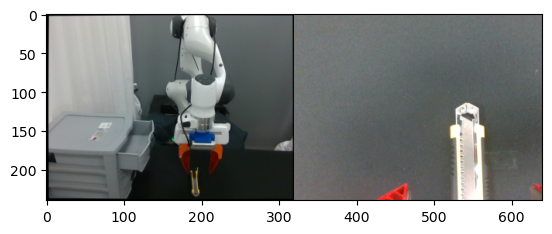

In [10]:
img=images[0]
plt.imshow(img[:,:,::-1] )

In [13]:
dirname="franka_drawer58"
savepath = os.path.join("videos", dirname)
os.makedirs(savepath, exist_ok=True)

 
for i, demo_name in enumerate(demos):
    video_fn = f"{savepath}/{demo_name}.mp4"

    print(f"processing {demo_name} {i+1}/{len(demos)} {video_fn}")
    demo=f['data'][demo_name]
    images=demo['obs']['agentview_rgb']
    images_wrist=demo['obs']['eye_in_hand_rgb']
    images=np.concatenate([images, images_wrist], axis=2)

    
    video_writer = imageio.get_writer(video_fn, fps=20)
    for image in images:

        video_writer.append_data(image[:,:,::-1]) #[::-1]
    video_writer.close()

f.close()

processing demo_0 1/58 videos/franka_drawer58/demo_0.mp4
processing demo_1 2/58 videos/franka_drawer58/demo_1.mp4
processing demo_2 3/58 videos/franka_drawer58/demo_2.mp4
processing demo_3 4/58 videos/franka_drawer58/demo_3.mp4
processing demo_4 5/58 videos/franka_drawer58/demo_4.mp4
processing demo_5 6/58 videos/franka_drawer58/demo_5.mp4
processing demo_6 7/58 videos/franka_drawer58/demo_6.mp4
processing demo_7 8/58 videos/franka_drawer58/demo_7.mp4
processing demo_8 9/58 videos/franka_drawer58/demo_8.mp4
processing demo_9 10/58 videos/franka_drawer58/demo_9.mp4
processing demo_10 11/58 videos/franka_drawer58/demo_10.mp4
processing demo_11 12/58 videos/franka_drawer58/demo_11.mp4
processing demo_12 13/58 videos/franka_drawer58/demo_12.mp4
processing demo_13 14/58 videos/franka_drawer58/demo_13.mp4
processing demo_14 15/58 videos/franka_drawer58/demo_14.mp4
processing demo_15 16/58 videos/franka_drawer58/demo_15.mp4
processing demo_16 17/58 videos/franka_drawer58/demo_16.mp4
processin

In [14]:
f.close()

In [13]:
# initialize a benchmark
# benchmark_instance = benchmark_dict["libero_10"]()
benchmark_instance = benchmark_dict["libero_90"]()

# benchmark_instance = benchmark_dict["libero_object"]()
# benchmark_instance = benchmark_dict["libero_spatial"]()
# benchmark_instance = benchmark_dict["libero_goal"]()

num_tasks = benchmark_instance.get_num_tasks()
# see how many tasks involved in the benchmark
print(f"{num_tasks} tasks in the benchmark {benchmark_instance.name}: ")

# Check if all the task names and their bddl file names
task_names = benchmark_instance.get_task_names()
print("The benchmark contains the following tasks:")
for i in range(num_tasks):
    task_name = task_names[i]
    task = benchmark_instance.get_task(i)
    bddl_file = os.path.join(bddl_files_default_path, task.problem_folder, task.bddl_file)
    print(f"\t {task_name}, detail definition stored in {bddl_file}")
    if not os.path.exists(bddl_file):
        print(colored(f"[error] bddl file {bddl_file} cannot be found. Check your paths", "red"))

NameError: name 'benchmark_dict' is not defined

In [ ]:
demo_files = [os.path.join(datasets_default_path, benchmark_instance.get_task_demonstration(i)) for i in range(num_tasks)]
len(demo_files), demo_files 

In [ ]:
hdf5_file = demo_files[0]
# get_dataset_info(hdf5_file)


f=h5py.File(hdf5_file, 'r')

demos = sorted(list(f["data"].keys()))
inds = np.argsort([int(elem[5:]) for elem in demos])
demos = [demos[i] for i in inds]
len(demos), demos[:5]

In [ ]:
traj_lengths = []
action_min = np.inf
action_max = -np.inf
for ep in demos:
    traj_lengths.append(f["data/{}/actions".format(ep)].shape[0])
    action_min = min(action_min, np.min(f["data/{}/actions".format(ep)][()]))
    action_max = max(action_max, np.max(f["data/{}/actions".format(ep)][()]))
traj_lengths = np.array(traj_lengths)

problem_info = json.loads(f["data"].attrs["problem_info"])

language_instruction = "".join(problem_info["language_instruction"])

print('attrs: ', f["data"].attrs.keys())

action_min, action_max, traj_lengths.mean(), traj_lengths.std(), language_instruction

In [ ]:
demo_name="demo_0"
demo=f['data'][demo_name]
for key in demo['obs'].keys():
    print(key, demo['obs'][key].shape)

images = demo['obs']['agentview_rgb'][()]
images.shape

In [ ]:
hdf5_file = demo_files[0]

for hdf5_file in demo_files: 
    print(f"processing {hdf5_file}")
    f=h5py.File(hdf5_file, 'r')
    demos = sorted(list(f["data"].keys()))
    inds = np.argsort([int(elem[5:]) for elem in demos])
    demos = [demos[i] for i in inds]

    problem_info = json.loads(f["data"].attrs["problem_info"])
    language_instruction = "".join(problem_info["language_instruction"])

    dirname=language_instruction.replace(" ", "_")

    savepath = os.path.join("videos", dirname)
    os.makedirs(savepath, exist_ok=True)
    
    demo_name="demo_0"

    for i, demo_name in enumerate(demos):
        # print(f"processing {demo_name} {i+1}/{len(demos)}")
        demo=f['data'][demo_name]
        images = demo['obs']['agentview_rgb'][()]

        video_writer = imageio.get_writer(f"{savepath}/{demo_name}.mp4", fps=30)
        for image in images:
            video_writer.append_data(image[::-1])
        video_writer.close()

    f.close()